In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tkinter as tk
import warnings
from tkinter import messagebox
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
import tkinter as tk
from tkinter import messagebox
from datetime import datetime

# GUI to take patient's information

In [36]:
symptoms = []
def submit():
    current_time = datetime.now()
    age = age_entry.get()
    gender = gender_var.get()
    cholesterol = cholesterol_var.get()
    blood_pressure = blood_pressure_var.get()
    city = city_entry.get()  
    
    arr=[]
    if fever_var.get():
        symptoms.append(1)
        arr.append("Fever")
    else:
        symptoms.append(0)
    if cough_var.get():
        arr.append("cough")
        symptoms.append(1)
    else:
        symptoms.append(0)
    if fatigue_var.get():
        arr.append("fatigue")
        symptoms.append(1)
    else:
        symptoms.append(0)
    if difficulty_breathing_var.get():
        arr.append("difficulty breathing")
        symptoms.append(1)
    else:
        symptoms.append(0)
    symptoms.extend([int(age), gender, cholesterol, blood_pressure, city])  # Add city to the list of symptoms
    output_list = [
        f"Age: {age}",
        f"Gender: {gender}",
        f"Cholesterol Level: {cholesterol}",
        f"Blood Pressure: {blood_pressure}",
        f"City: {city}",
        "Symptoms: " + ", ".join(arr)
    ]
    
    messagebox.showinfo("Submission", "\n".join(output_list))
    root.destroy()
    
root = tk.Tk()
root.title("Patient's Information")

window_width = 500
window_height = 450  
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x_position = (screen_width - window_width) // 2
y_position = (screen_height - window_height) // 2

root.geometry(f"{window_width}x{window_height}+{x_position}+{y_position}")

fever_var = tk.BooleanVar()
cough_var = tk.BooleanVar()
fatigue_var = tk.BooleanVar()
difficulty_breathing_var = tk.BooleanVar()
gender_var = tk.StringVar()
cholesterol_var = tk.StringVar()
blood_pressure_var = tk.StringVar()

tk.Label(root, text="Age:", font=("Helvetica", 12)).grid(row=0, column=0, sticky="w", padx=10, pady=5)
tk.Label(root, text="Gender:", font=("Helvetica", 12)).grid(row=1, column=0, sticky="w", padx=10, pady=5)
tk.Label(root, text="Blood Cholesterol Level:", font=("Helvetica", 12)).grid(row=2, column=0, sticky="w", padx=10, pady=5)
tk.Label(root, text="Blood Pressure:", font=("Helvetica", 12)).grid(row=3, column=0, sticky="w", padx=10, pady=5)
tk.Label(root, text="City:", font=("Helvetica", 12)).grid(row=4, column=0, sticky="w", padx=10, pady=5)  # Added label for city
tk.Label(root, text="Symptoms:", font=("Helvetica", 12)).grid(row=5, column=0, sticky="w", padx=10, pady=5)  # Adjusted row number

age_entry = tk.Entry(root, font=("Helvetica", 12))
age_entry.grid(row=0, column=1, pady=5)

tk.Radiobutton(root, text="Male", variable=gender_var, value="Male", font=("Helvetica", 12)).grid(row=1, column=1, sticky="w", pady=5)
tk.Radiobutton(root, text="Female", variable=gender_var, value="Female", font=("Helvetica", 12)).grid(row=1, column=1, sticky="e", pady=5)

tk.Radiobutton(root, text="Low", variable=cholesterol_var, value="Low", font=("Helvetica", 12)).grid(row=2, column=1, sticky="w", pady=5)
tk.Radiobutton(root, text="Normal", variable=cholesterol_var, value="Normal", font=("Helvetica", 12)).grid(row=2, column=1, pady=5)
tk.Radiobutton(root, text="High", variable=cholesterol_var, value="High", font=("Helvetica", 12)).grid(row=2, column=1, sticky="e", pady=5)

tk.Radiobutton(root, text="Low", variable=blood_pressure_var, value="Low", font=("Helvetica", 12)).grid(row=3, column=1, sticky="w", pady=5)
tk.Radiobutton(root, text="Normal", variable=blood_pressure_var, value="Normal", font=("Helvetica", 12)).grid(row=3, column=1, pady=5)
tk.Radiobutton(root, text="High", variable=blood_pressure_var, value="High", font=("Helvetica", 12)).grid(row=3, column=1, sticky="e", pady=5)

city_entry = tk.Entry(root, font=("Helvetica", 12))
city_entry.grid(row=4, column=1, pady=5)  

tk.Checkbutton(root, text="Fever", variable=fever_var, font=("Helvetica", 12)).grid(row=5, column=1, sticky="w", pady=5)  # Adjusted row number
tk.Checkbutton(root, text="Cough", variable=cough_var, font=("Helvetica", 12)).grid(row=6, column=1, sticky="w", pady=5)  # Adjusted row number
tk.Checkbutton(root, text="Fatigue", variable=fatigue_var, font=("Helvetica", 12)).grid(row=7, column=1, sticky="w", pady=5)  # Adjusted row number
tk.Checkbutton(root, text="Difficulty Breathing", variable=difficulty_breathing_var, font=("Helvetica", 12)).grid(row=8, column=1, sticky="w", pady=5)  # Adjusted row number

submit_button = tk.Button(root, text="Submit", command=submit, font=("Helvetica", 12), bg="#4CAF50", fg="white")
submit_button.grid(row=9, columnspan=2, pady=10)  

root.mainloop()


In [37]:
patient_city = symptoms[-1]
symptoms=symptoms[:-1]

# dictionary that map predicted disease to specialized field

In [38]:
medical_specialties = {
    'Infectious Diseases': ['Influenza', 'Common Cold', 'Gastroenteritis', 'Dengue Fever', 'Hepatitis', 'Malaria', 'Tuberculosis', 'Ebola Virus', 'HIV/AIDS', 'Measles', 'Pneumonia', 'Typhoid Fever', 'Cholera', 'Rabies', 'Zika Virus', 'Pneumocystis Pneumonia (PCP)', 'Lyme Disease'],
    'Endocrinology': ['Hyperthyroidism', 'Diabetes', 'Hypothyroidism', 'Hyperglycemia', 'Hypoglycemia'],
    'Allergy and Immunology': ['Allergic Rhinitis'],
    'Neurology': ['Migraine', 'Epilepsy', 'Stroke', "Parkinson's Disease", "Alzheimer's Disease", 'Multiple Sclerosis'],
    'Cardiology': ['Hypertensive Heart Disease', 'Myocardial Infarction (Heart Attack)', 'Coronary Artery Disease'],
    'Pulmonology': ['Asthma', 'Bronchitis', 'Chronic Obstructive Pulmonary Disease'],
    'Gastroenterology': ['Ulcerative Colitis', 'Pancreatitis', "Crohn's Disease", 'Liver Cancer', 'Liver Disease', 'Colorectal Cancer', 'Esophageal Cancer'],
    'Rheumatology': ['Rheumatoid Arthritis'],
    'Oncology': ['Kidney Cancer', 'Bladder Cancer', 'Prostate Cancer', 'Ovarian Cancer', 'Pancreatic Cancer', 'Lung Cancer', 'Breast Cancer', 'Colorectal Cancer', 'Thyroid Cancer', 'Melanoma', 'Brain Tumor'],
    'Nephrology': ['Kidney Disease', 'Chronic Kidney Disease'],
    'Urology': ['Urinary Tract Infection'],
    'Dermatology': ['Eczema', 'Psoriasis', 'Acne'],
    'Psychiatry/Psychology': ['Anxiety Disorders', 'Depression', 'Bipolar Disorder', 'Obsessive-Compulsive Disorder', 'Schizophrenia', 'Eating Disorders (Anorexia, Bulimia, etc.)', 'Autism Spectrum Disorder (ASD)', 'Tourette Syndrome', 'ADHD'],
    'Ophthalmology': ['Glaucoma', 'Cataracts'],
    'Gynecology/Obstetrics': ['Endometriosis', 'Polycystic Ovary Syndrome (PCOS)'],
    'Orthopedics': ['Muscular Dystrophy', 'Osteoporosis', 'Osteoarthritis', 'Scoliosis', 'Osteomyelitis'],
    'Hematology': ['Hemophilia', 'Anemia', 'Sickle Cell Anemia', 'Lymphoma'],
    'Andrology': ['Testicular Cancer'],
    'Gynecological Oncology': ['Ovarian Cancer'],
    'Gastrointestinal Surgery': ['Appendicitis', 'Cholecystitis', 'Diverticulitis'],
    'ENT Specialist': ['Sinusitis', 'Tonsillitis', 'Otitis Media (Ear Infection)'],
    'General Practitioner/Family Medicine Physician': ['For initial evaluation and referral to specialists as needed.'],
    'Acupuncturist': ['Acupuncture'],
    'Physiatrist': ['Physical Medicine and Rehabilitation'],
    'Chiropractor': ['Chiropractic Care'],
    'Pain Management Specialist': ['Pain Management'],
    'Allergist': ['Allergy Testing', 'Immunotherapy'],
    'Dermatologist': ['Skin Conditions Diagnosis and Treatment'],
    'Pediatric Dermatologist': ['Pediatric Skin Conditions Diagnosis and Treatment'],
    'Rheumatologist': ['Rheumatologic Conditions Diagnosis and Treatment'],
    'Physician Assistant': ['Primary Care Services', 'Assisting Physicians'],
    'Family Nurse Practitioner': ['Primary Care Services', 'Family Health'],
    'Family Physician': ['Primary Care Services', 'Family Health'],
    'Internist': ['Internal Medicine Services'],
    'Surgeon': ['Surgical Procedures'],
    'Ear, Nose & Throat Doctor': ['ENT Conditions Diagnosis and Treatment'],
    'Pulmonologist': ['Respiratory Conditions Diagnosis and Treatment'],
    'Adult Nurse Practitioner': ['Primary Care Services', 'Adult Health'],
    'Nurse Practitioner': ['Primary Care Services'],
    'Facial Plastic & Reconstructive Surgeon': ['Facial Plastic Surgery', 'Reconstructive Surgery'],
    'Sinus Surgeon / Rhinologist': ['Sinus Conditions Diagnosis and Treatment'],
    'Primary Care Doctor': ['Primary Care Services'],
    'Addiction Specialist': ['Substance Use Disorder Treatment'],
    'Audiologist': ['Hearing Testing', 'Hearing Aid Fitting'],
    'Pediatric Otolaryngologist': ['Pediatric ENT Conditions Diagnosis and Treatment'],
    'Infectious Disease Specialist': ['Infectious Disease Diagnosis and Treatment'],
    'Urgent Care Specialist': ['Urgent Care Services'],
    'Head & Neck Surgeon': ['Head and Neck Conditions Diagnosis and Treatment'],
    'Pediatrician': ['Pediatric Care Services'],
    'Cardiologist': ['Heart Conditions Diagnosis and Treatment'],
    'Interventional Cardiologist': ['Interventional Cardiology Procedures'],
    'Pediatric Cardiologist': ['Pediatric Heart Conditions Diagnosis and Treatment'],
    'Nephrologist': ['Kidney Conditions Diagnosis and Treatment'],
    'Dentist': ['Dental Care Services'],
    'Dietitian': ['Nutritional Counseling'],
    'Psychiatrist': ['Psychiatric Evaluation', 'Medication Management'],
    'Nutritionist': ['Nutritional Counseling'],
    'Endocrinologist': ['Endocrine Conditions Diagnosis and Treatment'],
    'Family Psychiatric & Mental Health Nurse Practitioner': ['Mental Health Services', 'Family Psychiatric Care'],
    'Bariatric Surgeon': ['Bariatric Surgery'],
    'Child and Adolescent Psychiatrist': ['Child and Adolescent Mental Health Services'],
    'Gastroenterologist': ['Gastrointestinal Conditions Diagnosis and Treatment'],
    'OB-GYN': ['Obstetric Care', 'Gynecological Care'],
    'Neurologist': ['Neurological Conditions Diagnosis and Treatment'],
    'Psychosomatic Medicine Specialist': ['Psychosomatic Medicine'],
    'Forensic Psychiatrist': ['Forensic Psychiatry'],
    'Neuro-Otologist': ['Neuro-Otology Services'],
    'Emergency Medicine Physician': ['Emergency Medical Care'],
    'Pediatric Emergency Medicine Specialist': ['Pediatric Emergency Medical Care'],
    'Nuclear Medicine Specialist': ['Nuclear Medicine Procedures'],
    'Endodontist': ['Endodontic Treatment'],
    'Periodontist': ['Periodontal Treatment'],
    'Prosthodontist': ['Prosthodontic Treatment'],
    'Pediatric Dentist': ['Pediatric Dental Care'],
    'Optometrist': ['Vision Testing', 'Eyewear Prescription'],
    'Cornea & External Diseases Specialist': ['Cornea and External Eye Diseases Diagnosis and Treatment'],
    'Refractive Surgeon': ['Refractive Surgery'],
    'Oculoplastic Surgeon': ['Oculoplastic Surgery'],
    'Pediatric / Strabismus Eye Doctor': ['Pediatric Eye Conditions Diagnosis and Treatment'],
    'Retina Specialist (Medical)': ['Retinal Conditions Diagnosis and Treatment'],
    'Neuro-Ophthalmologist': ['Neuro-Ophthalmology Services'],
    'Glaucoma Specialist': ['Glaucoma Diagnosis and Treatment'],
    'Adult Psychiatric & Mental Health Nurse Practitioner': ['Adult Mental Health Services'],
    "Women's Health Nurse Practitioner": ["Women's Health Services"],
    'Hand Surgeon': ['Hand Surgery'],
    'Orthopedic Surgeon': ['Orthopedic Surgery'],
    'Spine Specialist': ['Spine Conditions Diagnosis and Treatment'],
    'Occupational Therapist': ['Occupational Therapy'],
    'Physical Therapist': ['Physical Therapy'],
    'Sports Medicine Specialist': ['Sports Medicine'],
    'Hematologist': ['Blood Disorders Diagnosis and Treatment'],
    'Oncologist': ['Cancer Diagnosis and Treatment'],
    'Diagnostic Radiologist': ['Diagnostic Imaging Services'],
    'Pediatric Nurse Practitioner': ['Pediatric Care Services'],
    'Psychologist': ['Psychological Counseling', 'Psychotherapy'],
    'Reproductive Endocrinologist': ['Reproductive Endocrinology'],
    'Gynecologist': ['Gynecological Care'],
    'Urological Surgeon': ['Urological Surgery'],
    'Urologist': ['Urological Conditions Diagnosis and Treatment'],
    'Neurosurgeon': ['Neurosurgery'],
    'Sleep Medicine Specialist': ['Sleep Disorders Diagnosis and Treatment'],
    'Midwife': ['Midwifery Services'],
    'Radiation Oncologist': ['Radiation Oncology'],
    'Oral Surgeon': ['Oral Surgery'],
    'Orthodontist': ['Orthodontic Treatment'],
    'Pediatric Sports Medicine Specialist': ['Pediatric Sports Medicine'],
    'Geriatrician': ['Geriatric Care'],
    'Plastic Surgeon': ['Plastic Surgery'],
    'Laryngologist': ['Laryngology Services'],
    'Podiatrist': ['Podiatric Care'],
    'Foot & Ankle Specialist': ['Foot and Ankle Conditions Diagnosis and Treatment'],
    'Psychotherapist': ['Psychotherapy'],
    'Pulmonary Diseases and Critical Care Medicine Specialist': ['Pulmonary Diseases Diagnosis and Treatment', 'Critical Care Medicine'],
    'Pediatric Orthopedic Surgeon': ['Pediatric Orthopedic Surgery'],
    'Hand & Microsurgery Specialist': ['Hand and Microsurgery'],
    'Hip and Knee Surgeon': ['Hip and Knee Surgery'],
    'Anesthesiologist': ['Anesthesia Services'],
    'Radiologist': ['Radiological Interpretation'],
    'Shoulder & Elbow Surgeon': ['Shoulder and Elbow Surgery'],
    'Clinical Neurophysiologist': ['Clinical Neurophysiology Services'],
    'Colorectal Surgeon': ['Colorectal Surgery'],
    'Vascular Surgeon': ['Vascular Surgery'],
    'Travel Medicine Specialist': ['Travel Medicine Services']
}


In [39]:
data= pd.read_csv("data.csv")

In [40]:
data

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease
0,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,Influenza
1,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,Common Cold
2,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,Eczema
3,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Asthma
4,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Asthma
...,...,...,...,...,...,...,...,...,...,...
344,Yes,No,Yes,No,80,Female,High,High,Positive,Stroke
345,Yes,No,Yes,No,85,Male,High,High,Positive,Stroke
346,Yes,No,Yes,No,85,Male,High,High,Positive,Stroke
347,Yes,No,Yes,No,90,Female,High,High,Positive,Stroke


In [41]:
data.isnull().sum()

Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
Disease                 0
dtype: int64

In [42]:
data.columns

Index(['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable', 'Disease'],
      dtype='object')

In [43]:
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [44]:
categorical_features

Index(['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable', 'Disease'],
      dtype='object')

In [45]:
numerical_features 

Index(['Age'], dtype='object')

# Distribution of age in the dataset

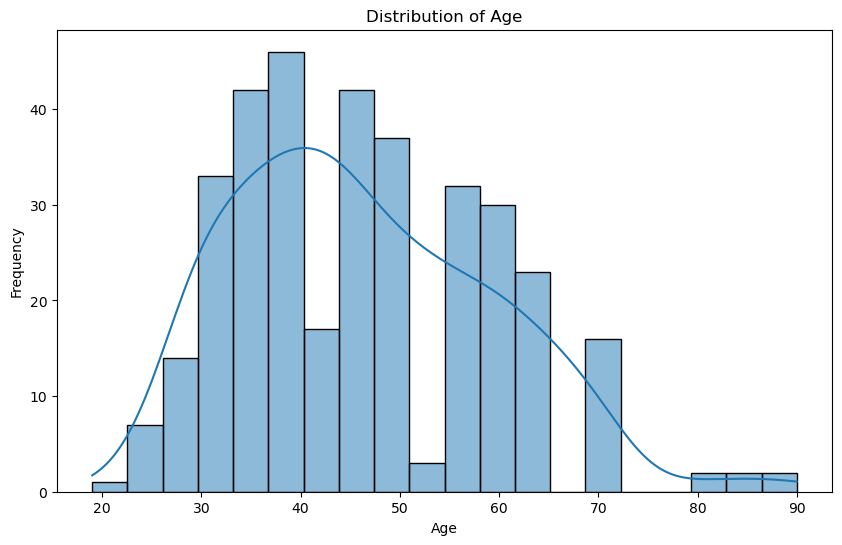

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [47]:
X = data.drop(['Disease','Outcome Variable'], axis=1)
y = data['Disease']

# Applying different models 

In [48]:
from sklearn.linear_model import LogisticRegression
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.12857142857142856


In [49]:
y_train

228                  Ebola Virus
78     Conjunctivitis (Pink Eye)
90                  Pancreatitis
16                  Pancreatitis
66               Hyperthyroidism
                 ...            
188                     Diabetes
71                     Psoriasis
106            Anxiety Disorders
270                Typhoid Fever
102                 Liver Cancer
Name: Disease, Length: 279, dtype: object

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
model = SVC()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.15714285714285714


In [51]:
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.24285714285714285


In [52]:
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


feature_names = X.columns.tolist()

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3


In [53]:
y_test

157                                  Hypothyroidism
341                                     Tonsillitis
315    Chronic Obstructive Pulmonary Disease (COPD)
234                                    Lyme Disease
155                                        Diabetes
                           ...                     
94                               Ulcerative Colitis
181                                          Asthma
179                               Allergic Rhinitis
199                              Sickle Cell Anemia
326                                          Stroke
Name: Disease, Length: 70, dtype: object

In [54]:
y_train

228                  Ebola Virus
78     Conjunctivitis (Pink Eye)
90                  Pancreatitis
16                  Pancreatitis
66               Hyperthyroidism
                 ...            
188                     Diabetes
71                     Psoriasis
106            Anxiety Disorders
270                Typhoid Fever
102                 Liver Cancer
Name: Disease, Length: 279, dtype: object

# Comparison of Algorithm Accuracies

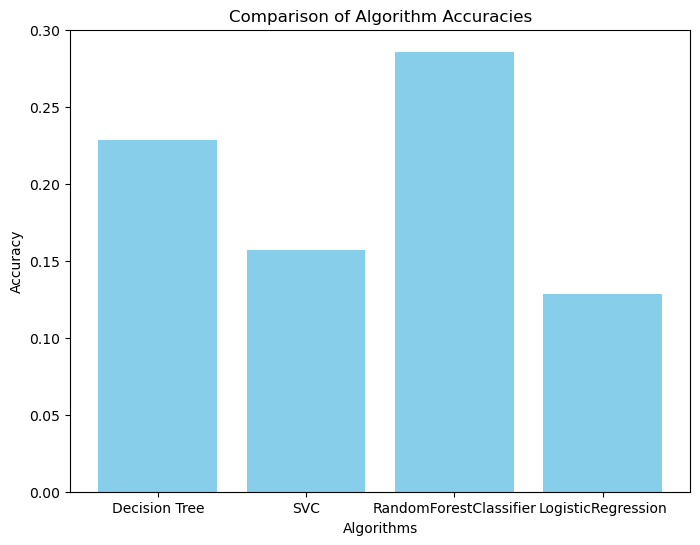

In [55]:
algorithms = ['Decision Tree', 'SVC', 'RandomForestClassifier','LogisticRegression' ]
accuracies = [0.22857142857142856, 0.15714285714285714, 0.2857142857142857, 0.12857142857142856]

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies, color=['skyblue'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim(0, 0.3)  # Setting y-axis limits
plt.show()

In [56]:
symptoms

[1, 1, 0, 0, 46, 'Male', 'High', 'Low']

In [57]:
for i in range(len(symptoms)):
    if symptoms[i]=="Male":
        symptoms[i]=0;
    elif symptoms[i]=="Female":
        symptoms[i]=1;
    elif symptoms[i]=="High":
        symptoms[i]=2; 
    elif symptoms[i]=="Low":
        symptoms[i]=0;
    elif symptoms[i]=="Normal":
        symptoms[i]=1;

In [58]:
arr=np.array(symptoms)
arr=arr.reshape(1,-1)

In [59]:
arr.shape

(1, 8)

In [60]:
perdicted_disease = model.predict(arr)[0]

In [61]:
perdicted_disease

'Kidney Disease'

# Which doctor to consult according to predicted disease?

In [62]:
doctor_to_consult=''
for specialty, conditions in medical_specialties.items():
    # Check if predicted disease is in the current specialty's conditions list
    if perdicted_disease in conditions:
        doctor_to_consult = specialty
        break


In [63]:
doctor_to_consult

'Nephrology'

In [64]:
df=pd.read_csv("dr mock dataset.csv")

In [65]:
df["Location"] = df["Location"].str.lower()

In [66]:
df

,doctor_name,Speciality,Availability,Ratings,Location
0,Dr. Ananya Desai,Infectious Diseases,"Monday, Friday",3.5,mumbai
1,Dr. Rohan Patel,Endocrinology,"Monday, Wednesday",4.7,delhi
2,Dr. Sneha Singh,Allergy and Immunology,"Tuesday, Thursday",4.9,bangalore
3,Dr. Akash Sharma,Neurology,"Wednesday, Friday",4.5,kolkata
4,Dr. Pooja Reddy,Cardiology,"Monday,Tuesday",4.7,chennai
...,...,...,...,...,...
494,Dr. Vivek Sachan,Oncologist,"Thursday, Friday",4.5,jaipur
495,Dr. Aisha Khan,Oncologist,"Wednesday, Friday",4.1,chandigarh
496,Dr. Rajiv Patel,Oncologist,"Monday,Tuesday",4.7,gurgaon
497,Dr. Priyanka Banerjee,Gynecologist,"Tuesday, Wednesday",4.2,noida


# Finding best rated doctor 

In [67]:
lst= np.array(df['Location'].unique())
if patient_city.lower() in lst:
    location = df[df['Location'] == patient_city.lower()]
    All_Doctor_List = np.array(location['Speciality'].unique())
    if((doctor_to_consult)in All_Doctor_List):
        df_new = location[(location['Speciality']==doctor_to_consult)].sort_values(by='Ratings',ascending=False)
        print("Doctors Available according to past Ratings : ")
        df_string = df_new.to_string(index=False)
        print(df_string)
    else:
        print("No Doctor is available in Your City But You can contact : ")
        df_new=df[df['Speciality']==doctor_to_consult].sort_values(by="Ratings")
        df_string = df_new.to_string(index=False)
        print(df_string)

Doctors Available according to past Ratings : 
       doctor_name Speciality    Availability  Ratings Location
Dr. Rahul Malhotra Nephrology Friday, Tuesday      3.6    surat


# GUI for rcommending doctors

In [ ]:
import tkinter as tk
from tkinter import scrolledtext
import numpy as np
import pandas as pd

def display_dataframe_on_gui():
    result_text.insert(tk.END, "Patient Disease: " + str(perdicted_disease) + "\n\n")
    lst = np.array(df['Location'].unique())
    if patient_city.lower() in lst:
        location = df[df['Location'] == patient_city.lower()]
        All_Doctor_List = np.array(location['Speciality'].unique())
        if doctor_to_consult in All_Doctor_List:
            df_new = location[location['Speciality'] == doctor_to_consult].sort_values(by='Ratings', ascending=False)
            result_text.insert(tk.END, "Doctors available according to past ratings:\n\n")
            result_text.insert(tk.END, df_new.to_string(index=False) + "\n\n")
        else:
            result_text.insert(tk.END, "No doctor is available in your city. But you can contact:\n\n")
            df_new = df[df['Speciality'] == doctor_to_consult].sort_values(by="Ratings")
            result_text.insert(tk.END, df_new.to_string(index=False) + "\n\n")

root = tk.Tk()
root.title("Recommended Doctors")

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

x_position = (screen_width - 600) // 2
y_position = (screen_height - 400) // 2

root.geometry("850x460+{}+{}".format(x_position, y_position))

result_text = scrolledtext.ScrolledText(root, width=80, height=20, wrap=tk.WORD, font=("Courier", 10), bg="white", fg="black", borderwidth=2, relief=tk.SOLID)
result_text.grid(row=0, column=0, padx=10, pady=10)

display_dataframe_on_gui()

root.mainloop()
